💎 **Clasificación de riesgo crediticio** <br>
👩🏻‍💻 **By:** Holguer Andrade Benavides <br>
🏆 **Bootcamp:** Inteligencia Artificial Nivel Innovador <br>
💾 **Dataset:** https://www.kaggle.com/datasets/laotse/credit-risk-dataset <br>

In [2]:
import pandas as pd

# Conectar a Google Drive y cargar dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Talento Tech/Proyecto/02_Clasificación_de_riesgo_crediticio/credit_risk_dataset.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
display(df.head())

Mounted at /content/drive


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# 🎯 **Analizar el dataset**

Realizar análisis de datos exploratorio (EDA) para comprender la distribución de datos, identificar valores faltantes y visualizar la relación entre las características y la variable objetivo `loan_status`.

In [3]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


# 🧐 **Preprocesar los datos**
Manejar valores faltantes, codificar características categóricas y escalar características numéricas para preparar los datos para la red neuronal.

- Manejar los valores faltantes imputando la mediana.
- Codificar características categóricas utilizando codificación one-hot.
- Escalar características numéricas utilizando StandardScaler, excluyendo la variable objetivo.

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Gestionar valores faltantes
imputer = SimpleImputer(strategy='median')
# Imputar valores faltantes en 'person_emp_length' y 'loan_int_rate' con la mediana
df[['person_emp_length', 'loan_int_rate']] = imputer.fit_transform(df[['person_emp_length', 'loan_int_rate']])

# 2. Codificar características categóricas
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Eliminar la variable de destino de la lista de características numéricas
numerical_features.remove('loan_status')

# 3. Crear un transformador de columna para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough' # Mantener otras columnas (loan_status)
)

# Aplicar los pasos de preprocesamiento
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_processed = preprocessor.fit_transform(X)

# Convierte los datos procesados ​​de nuevo a un DataFrame para facilitar su manejo, manteniendo la variable de destino separada
processed_columns = preprocessor.get_feature_names_out()
X_processed_df = pd.DataFrame(X_processed, columns=processed_columns)

# Muestra las primeras filas de las características procesadas y el objetivo.
display(X_processed_df.head())
display(y.head())

,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.903374,-0.114143,28.926614,4.019404,1.625921,3.931411,-0.691554
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.060904,-0.911147,0.056763,-1.358650,0.042310,-0.657458,-0.938167
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.430783,-0.911147,-0.921876,-0.646849,0.603713,3.744110,-0.691554
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.745843,-0.009274,-0.187897,4.019404,1.369558,3.369508,-0.938167
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,-0.588313,-0.188358,0.790742,4.019404,1.058028,3.556809,-0.444942


,loan_status
0,1
1,0
2,1
3,1
4,1


# ✍🏻 **Dividir los datos**
Dividir los datos en conjuntos de entrenamiento y de prueba.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.25, random_state=42)

print("Datos para entrenamiento")
display(X_train.head())
display(y_train.head())
print("Datos para prueba")
display(X_test.head())
display(y_test.head())

Datos para entrenamiento


,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length
15862,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.273252,2.162318,1.280061,3.228514,0.227281,-0.189207,-0.444942
25400,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.514400,-0.026215,-0.432557,0.381309,0.558281,0.185395,0.541510
3126,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.903374,-0.706378,0.056763,-0.963205,1.778441,-0.095556,-0.691554
26636,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.829461,0.692540,-0.187897,0.855843,0.155888,-0.282857,-0.198329
14099,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.588313,0.547337,0.790742,1.140563,-1.015595,-0.001906,-0.444942


,loan_status
15862,0
25400,0
3126,1
26636,0
14099,0


Datos para prueba


,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_DEBTCONSOLIDATION,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,...,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length
14668,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.588313,-0.614287,0.301422,0.064952,-0.207563,1.777452,-0.938167
24614,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-0.115722,-0.033475,-1.166536,0.064952,1.382538,-0.095556,1.034735
11096,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.273252,0.095594,1.280061,1.014021,-0.006367,0.466346,-0.691554
10424,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.745843,-0.614352,0.546082,0.064952,-0.006367,1.777452,-0.938167
26007,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.356869,-0.348082,-0.677217,0.539487,1.723274,1.121899,0.048284


,loan_status
14668,0
24614,0
11096,0
10424,1
26007,1


# 🧠 Construir la red neuronal
Diseñar el modelo para la red neuronal

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inicializar un modelo secuencial
model = Sequential()

# Añadir la capa de entrada
# La forma de entrada es el número de características en X_train
input_dim = X_train.shape[1]
model.add(Dense(64, input_shape=(input_dim,), activation='relu'))

# Añadir una o más capas ocultas
model.add(Dense(32, activation='relu'))

# Añadir la capa de salida
# Para la clasificación binaria, utilice una neurona y una activación 'sigmoid'
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Mostrar un resumen de la arquitectura del modelo
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

# 🦾 Entrenar el modelo
Entrenar el modelo de red neuronal compilado utilizando los datos de entrenamiento y almacenar el historial de entrenamiento.

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
611/611 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8366 - loss: 0.3947 - val_accuracy: 0.8907 - val_loss: 0.3081
Epoch 2/10
611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8995 - loss: 0.2815 - val_accuracy: 0.8975 - val_loss: 0.2896
Epoch 3/10
611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9132 - loss: 0.2563 - val_accuracy: 0.9042 - val_loss: 0.2736
Epoch 4/10
611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9143 - loss: 0.2555 - val_accuracy: 0.9096 - val_loss: 0.2658
Epoch 5/10
611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9193 - loss: 0.2397 - val_accuracy: 0.9134 - val_loss: 0.2593
Epoch 6/10
611/611 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9188 - loss: 0.2397 - val_accuracy: 0.9132 - val_loss: 0.2609
Epoch 7/10
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9249 - loss: 0.2249 - val_accuracy: 0.9134 - val_loss: 0.2572
Epoch 8/10
611/611 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9252 - loss: 0.2230 - val_accuracy: 0.

#🥇 Evaluar el modelo
Evaluar el modelo de red neuronal entrenado con los datos de prueba e imprima los resultados.

In [8]:
# Evaluar el modelo con los datos de prueba
evaluation_results = model.evaluate(X_test, y_test, verbose=0)

# Imprimir los resultados de la evaluación
print(f"Pérdida en la prueba: {evaluation_results[0]:.4f}")
print(f"Precisión en la prueba: {evaluation_results[1]:.4f}")

Pérdida en la prueba: 0.2459
Precisión en la prueba: 0.9166


# 📊 Reporte y gráficas

**Reporte de clasificación**

In [17]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Obtener predicciones del modelo en el conjunto de prueba
# La capa de salida tiene una activación sigmoid, por lo que la salida es una probabilidad.
# Convertir estas probabilidades en predicciones binarias (0 o 1).
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Generar el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6331
           1       0.94      0.67      0.78      1815

    accuracy                           0.92      8146
   macro avg       0.92      0.83      0.87      8146
weighted avg       0.92      0.92      0.91      8146



**Matriz de confusión**

Confusion Matrix:
[[6249   82]
 [ 597 1218]]


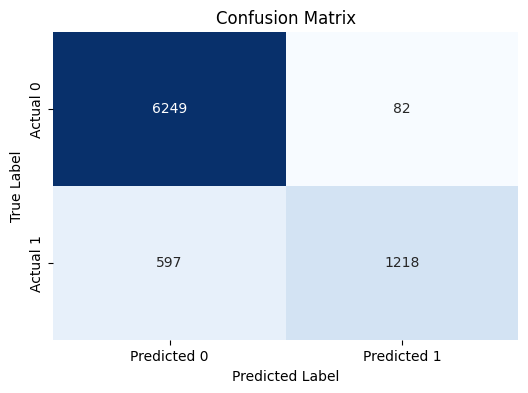

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Curva ROC**

ROC AUC Score: 0.9175


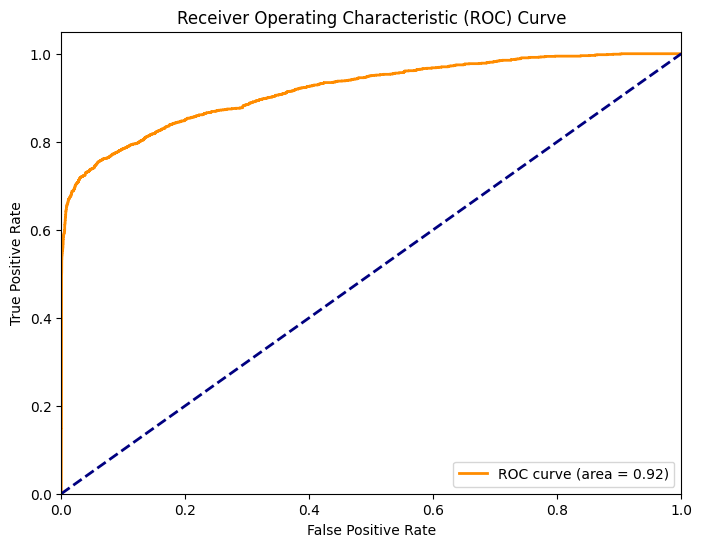

In [18]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Generar valores de curva ROC: fpr, tpr, umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular la puntuación ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()